# *Modelo de Bose-Hubbard con interacción de rango infinito*

$$
\rho = \rho(\beta,\mu) = \frac{\sum_{n=1}^\infty = ne^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}{\sum_{n=0}^\infty = e^{\beta[(\mu+\lambda-1)n-\lambda n^{2}]}}
$$

### Parametros

__β__ : Temeperatura inversa.

__λ__ : Constante asociada al término no lineal $\hat{n}^2$ del operador de energía positiva.

__µ__ : Potencial químico.

__N__ : Número de partículas en el sistema. 

### Condiciones

$0 < β,λ$

µ : Sin restricciones.

## *Desarrollo*

### Dependencias

In [18]:
import math
import matplotlib.pyplot as plt
import time

### Valores de *µ*

$$
 \rho(\beta,\mu) = \left\{
       \begin{array}{ll}
     0      & \mathrm{si\ \quad} \mu < 1 \\
     K & \mathrm{si\ \quad} 2(K - 1) \Lambda +1 < \mu < 2K \Lambda +1 \\
       \end{array}
     \right.
$$

In [19]:
def rangoK(k, lam):
    """Funcion del pimpa"""
    limInf = 2*(k-1)*lam+1
    limSup = 2*k*lam+1
    return (limInf, limSup)

\begin{equation}
f_{1} = \sum_{n=1}^\infty = ne^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [20]:
def f1(b, u, lam, N):
    sumatoria = 0
    for n in range(1, N):
        sumatoria += n*math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
    return sumatoria

\begin{equation}
f_{2} = \sum_{n=0}^\infty = e^{\beta[(\mu+\Lambda-1)n-\Lambda n^{2}]}
\end{equation}

In [21]:
def f2(b, u, lam, N):
    sumatoria = 0.0
    for n in range(N):
        resul = math.exp(b*((u+lam-1)*n-lam*math.pow(n, 2)))
        sumatoria += resul
    return sumatoria

### Parámetros formula

In [22]:
B = 2  # Temperatura inversa
U = 0.5
lam = 3
N = 10
K = 0.3  # Entero positivo

### Obtención de *ρ* y *µ*

$$
\rho_{0} = \frac{f_{1}}{f_{2}}
$$

In [23]:
start_time = time.time() #Para medir el tiempo de ejecución

numero_segmentaciones = 14.0
u = -2
x = []
y = []

for i in range(int(numero_segmentaciones)):
    u += 14/numero_segmentaciones
    try:
        ro =  f1(B, u, lam, N)/f2(B, u, lam, N)
        x.append(u)
        y.append(ro)
    except ZeroDivisionError:
        print('Division por cero')
        break
    except OverflowError:
        print('overflow')
        break
        
print("Magnitud vector x: ",str(len(x)))
print("Magnitud vector y: ",str(len(y)))

print ("Tiempo ejecución: ",time.time() - start_time,"ms")

Magnitud vector x:  14
Magnitud vector y:  14
Tiempo ejecución:  0.015600204467773438 ms


### Obtención verificador 

$$
\frac{\mu + \lambda - 1}{2 \lambda} 
$$

In [24]:
def verificador (U, lam):
    resultado = (U + lam -1)/2*lam
    return resultado

### Graficador

In [25]:
def grafica(x, y, foto=False): 
    if len(x) != 0 or len(y) != 0:
        plt.plot(x, y, 'bo')
        limInfx = min(x)-1
        limSupx = max(x)+1
        limInfy = min(y)-1
        limSupy = max(y)+1
        plt.axis([limInfx, limSupx, limInfy, limSupy])  # Longitud ejes x,y
        plt.title('ρ vs μ')
        plt.ylabel('ρ')
        plt.xlabel('μ')

        # define plot size in inches (width, height) & resolution(DPI)
        # plt.figure(figsize=(20, 10), dpi=100)
        # plt.figure(figsize=(2,2))
        if foto == True:
            fig = plt.gcf()
            fig.set_size_inches(18.5, 10.5)
            fig.savefig('test2png.png', dpi=100)
        plt.show()
    else:
        print("Vector vacío")
    

# Experimentacion

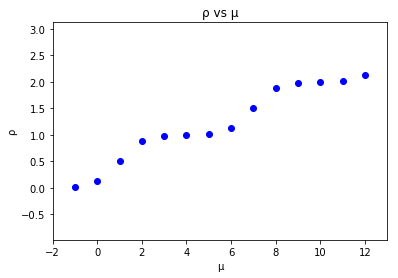

In [26]:
grafica(x, y)

In [27]:
def arreglos_B_XY(B, u, lam, N):
    numero_segmentaciones = 50.0
    u = -10
    x = []
    y = []

    for i in range(int(numero_segmentaciones)):
        u += 30/numero_segmentaciones
        try:
            ro = f1(B, u, lam, N)/f2(B, u, lam, N)
            x.append(u)
            y.append(ro)
        except ZeroDivisionError:
            print('Division por cero')
            break
        except OverflowError:
            print('overflow')
            break
    return x,y

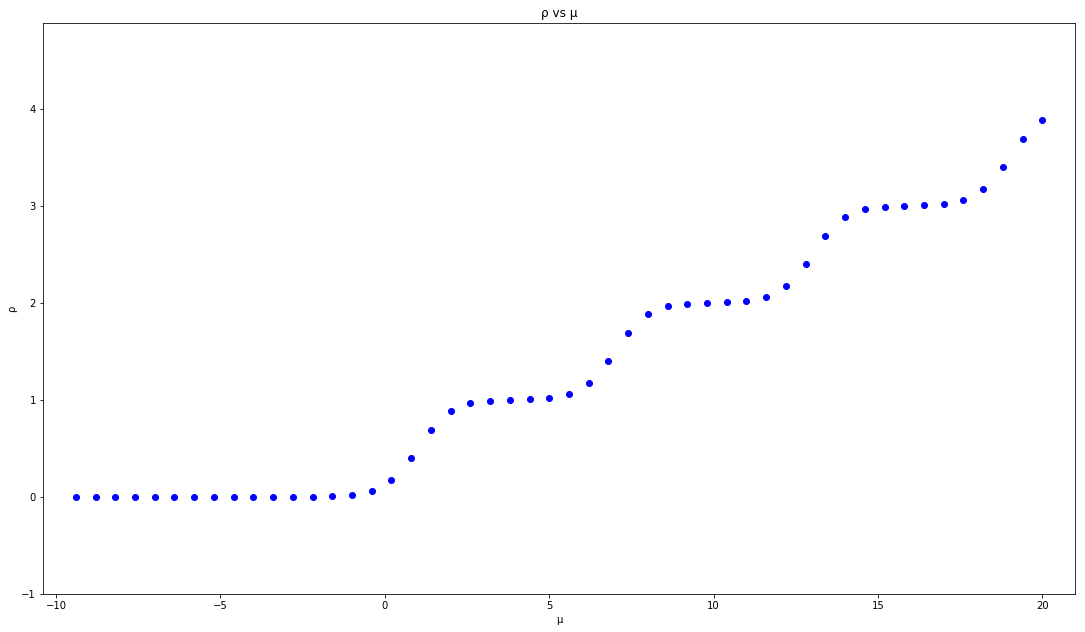

In [28]:
B = 2  # Temperatura inversa
U = 0.5
lam = 3
N = 10
K = 0.3  # Entero positivo

x1, y1 = arreglos_B_XY(2, U, lam, N)
grafica(x1, y1, True)

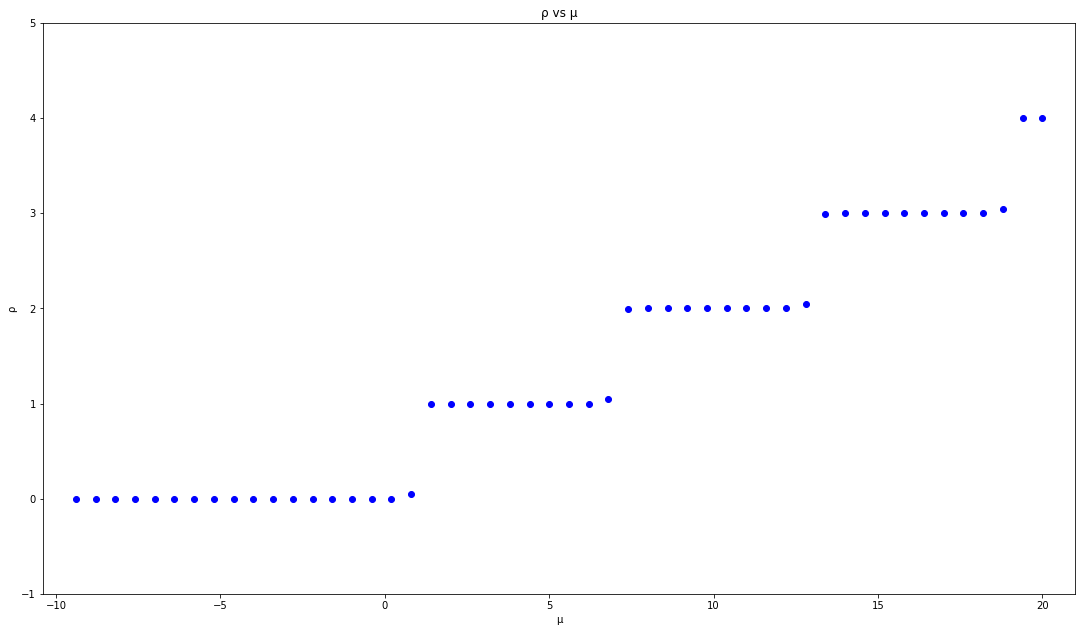

In [29]:
x1, y1 = arreglos_B_XY(15, U, lam, N)
grafica(x1, y1, True)

overflow


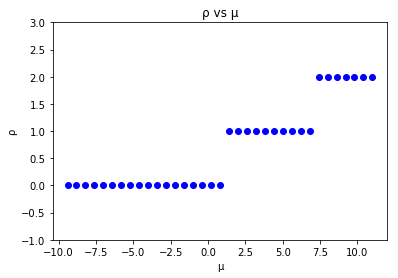

In [30]:

x1, y1 = arreglos_B_XY(50, U, lam, N)
grafica(x1, y1)

overflow


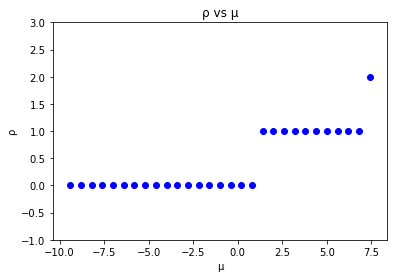

In [31]:
x1, y1 = arreglos_B_XY(100, U, lam, N)
grafica(x1, y1)

overflow


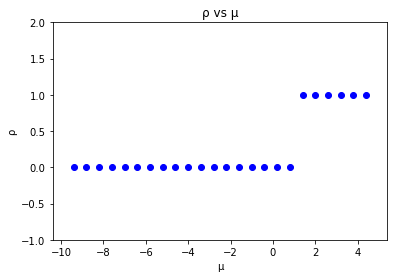

In [32]:
x1, y1 = arreglos_B_XY(200, U, lam, N)
grafica(x1, y1)

In [33]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [34]:
from IPython.display import HTML

import Problema1

HTML(Problema1.anim.to_html5_video())
#display_animation(Problema1.anim)